In [2]:
import pandas as pd

In [3]:
combined_df = pd.read_csv('FinalFile.csv')
missing_values = combined_df.isnull().sum()
print("Missing Values in each column:\n", missing_values)
dupes = combined_df.duplicated(subset='link').sum()
print("duplicated values:\n", dupes)





print(combined_df.shape)


Missing Values in each column:
 id             0
link           0
title          0
content       25
gold_label     0
dtype: int64
duplicated values:
 1
(1230, 5)


In [4]:
combined_df = combined_df.dropna()  # Drops rows where any column has NaN
combined_df = combined_df.drop_duplicates(subset='link', keep='first')
print(combined_df.shape)
print(combined_df.head(5))

(1204, 5)
   id                                               link  \
0   0  https://www.express.pk/story/2733439/netflix-d...   
1   1  https://www.express.pk/story/2733408/the-shoot...   
2   2  https://www.express.pk/story/2733380/a-colorfu...   
3   3  https://www.express.pk/story/2733374/disha-pat...   
4   4  https://www.express.pk/story/2733372/who-will-...   

                                               title  \
0  نیٹ فلکس ڈاؤن، سوشل میڈیا پر شکایتوں کا طوفان ...   
1  پاکستانی ویب سیریز ’فروٹ چاٹ‘ کی شوٹنگ کا آغا...   
2  ریاض میں رنگارنگ فیشن شو، جینیفر لوپیز سمیت دی...   
3  دیشا پٹانی کے والد کے ساتھ لاکھوں روپے کا فراڈ...   
4            ڈان 3 میں ولن کون ہوگا؟ نام سامنے آگیا   

                                             content     gold_label  
0  معروف امریکی اسٹریمنگ پلیٹ فارم نیٹ فلکس باکسن...  entertainment  
1  عالمی ایوارڈ یافتہ پاکستان شوبز کے نوجوان ہدای...  entertainment  
2  سعودی عرب کےدارالحکومتریاض میں منعقد ہونے والے...  entertainment  
3  بالی ووڈ 

In [5]:
import re

# Function to clean text
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters (optional)
    return text.strip()

# Apply cleaning function to 'title' and 'content'
combined_df['title'] = combined_df['title'].apply(clean_text)
combined_df['content'] = combined_df['content'].apply(clean_text)

combined_df['title'] = combined_df['title'].str.lower()
combined_df['content'] = combined_df['content'].str.lower()

print(combined_df.head(5))

   id                                               link  \
0   0  https://www.express.pk/story/2733439/netflix-d...   
1   1  https://www.express.pk/story/2733408/the-shoot...   
2   2  https://www.express.pk/story/2733380/a-colorfu...   
3   3  https://www.express.pk/story/2733374/disha-pat...   
4   4  https://www.express.pk/story/2733372/who-will-...   

                                               title  \
0  نیٹ فلکس ڈاؤن سوشل میڈیا پر شکایتوں کا طوفان اگیا   
1  پاکستانی ویب سیریز فروٹ چاٹ کی شوٹنگ کا اغاز ک...   
2  ریاض میں رنگارنگ فیشن شو جینیفر لوپیز سمیت دیگ...   
3  دیشا پٹانی کے والد کے ساتھ لاکھوں روپے کا فراڈ...   
4              ڈان 3 میں ولن کون ہوگا نام سامنے اگیا   

                                             content     gold_label  
0  معروف امریکی اسٹریمنگ پلیٹ فارم نیٹ فلکس باکسن...  entertainment  
1  عالمی ایوارڈ یافتہ پاکستان شوبز کے نوجوان ہدای...  entertainment  
2  سعودی عرب کےدارالحکومتریاض میں منعقد ہونے والے...  entertainment  
3  بالی ووڈ کی خوبرو ا

In [6]:
print(combined_df.describe(include='all'))


                 id                                               link  \
count   1204.000000                                               1204   
unique          NaN                                               1204   
top             NaN  https://www.express.pk/story/2733439/netflix-d...   
freq            NaN                                                  1   
mean     622.980066                                                NaN   
std      354.102537                                                NaN   
min        0.000000                                                NaN   
25%      324.750000                                                NaN   
50%      627.500000                                                NaN   
75%      928.250000                                                NaN   
max     1229.000000                                                NaN   

                                title  \
count                            1204   
unique                       


Distribution of articles by category:
gold_label
sports                248
entertainment         246
world                 241
business              237
science-technology    232
Name: count, dtype: int64


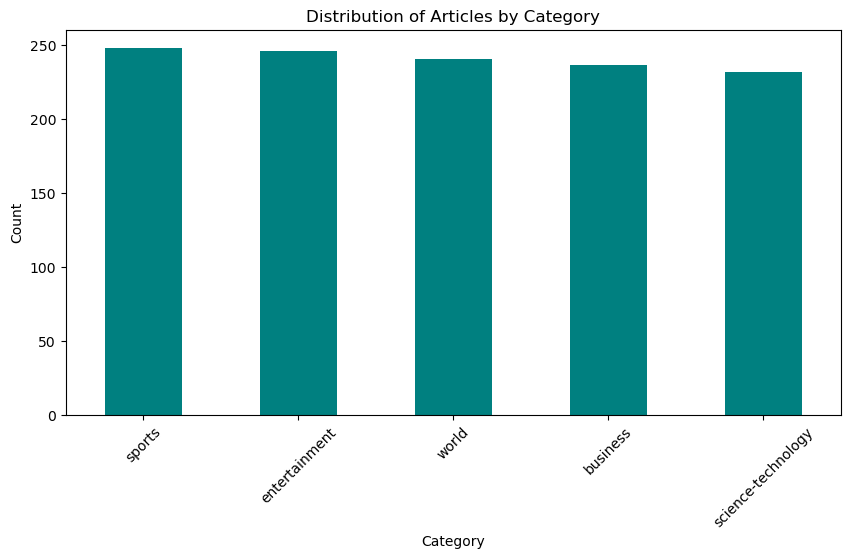

In [7]:
import matplotlib.pyplot as plt

print("\nDistribution of articles by category:")
category_distribution = combined_df['gold_label'].value_counts()
print(category_distribution)

# Plotting the category distribution
plt.figure(figsize=(10, 5))
category_distribution.plot(kind='bar', color='teal')
plt.title('Distribution of Articles by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

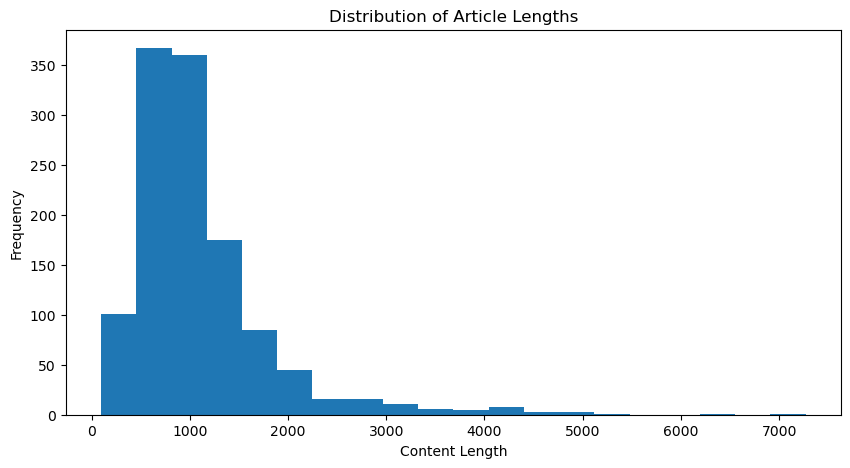

In [8]:
plt.figure(figsize=(10, 5))
combined_df['content_length'] = combined_df['content'].apply(len)
combined_df['content_length'].plot(kind='hist', bins=20, title='Distribution of Article Lengths')
plt.xlabel('Content Length')
plt.show()

In [9]:
short_articles = combined_df[combined_df['content_length'] < 50]  # Example threshold
long_articles = combined_df[combined_df['content_length'] > 10000]  # Example threshold

print(f"Number of short articles: {len(short_articles)}")
print(f"Number of long articles: {len(long_articles)}")

print("\nDataFrame shape before removing short articles:", combined_df.shape)

combined_df = combined_df[combined_df['content_length'] > 50]
print("\nDataFrame shape after removing short articles:", combined_df.shape)

Number of short articles: 0
Number of long articles: 0

DataFrame shape before removing short articles: (1204, 6)

DataFrame shape after removing short articles: (1204, 6)


In [11]:
combined_df.to_csv('afterEDAFinalindextrue.csv', encoding='utf-8-sig')
